## 개념 정리
### 용어 정리
- 차원 축소
    - 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습
    - 주성분을 이용해 데이터를 압축하는 과정
    - 저장 공간을 줄이고, 시각화하기 쉬우며, 성능을 높일 수도 있음
- 주성분 분석
    - 데이터에서 가장 분산이 큰 방향을 찾는 방법
    - 이러한 방향으로 향하는 벡터를 주성분이라고 한다.
    - 원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있음
    - 일반적으로 주성분은 원본 데이터에 있는 특성 갯수보다 작음
- 설명된 분산
    - 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 값
    - 사이킷런에서는 설명된 분산의 비율을 정하여 PCA 학습을 진행할 수 있음
### 핵심 패키지와 함수 (sklearn)
- PCA:  주성분 분석을 수행하는 클래스
    - n_components: 주성분의 갯수를 지정. 기본값은 None으로, 샘플 갯수와 특성 갯수 중에 가장 작은 값을 사용함
    - randon_state: Numpy 난수 Seed 값을 지정함
    - components_: 훈련셋에서 찾은 주성분이 저장됨
    - explained_varience_: 설명된 분산이 저장됨
    - explained_varience_ratio_: 설명된 분산의 비율이 저장됨
    - inverse_transform(): transform()으로 차원을 축소시킨 데이터를 원본 차원으로 복구하는 함수

In [36]:
'''데이터 수집 및 로딩'''
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) # 기존 데이터는 2차원 배열이므로, 2차원 배열

--2022-02-05 12:43:51--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-02-05 12:43:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.78.231.108
Connecting to github.com (github.com)|52.78.231.108|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-02-05 12:43:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... con

In [37]:
'''과일 사진 그려보기'''
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1): # 3차원 배열을 받아 10개의 이미지를 출력, 샘플 갯수에 따라 행과 열의 갯수 figsize를 지정함.
    n = len(arr) # 샘플의 갯수
    # 한 줄에 10개씩 이미지를 그림. 샘플 갯수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 갯수는 샘플 갯수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n: # n개 까지만 그린다.
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off') # 이미지 옆에 뜨는 크기 정보를 표시하지 않음
    plt.show()

(50, 10000)


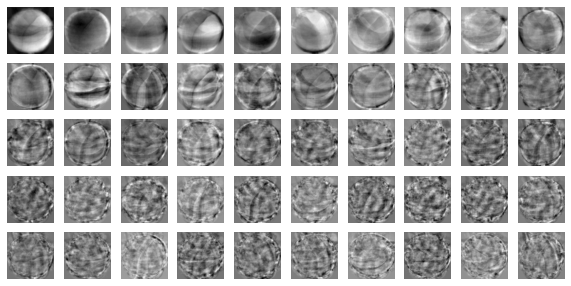

In [38]:
'''PCA 클래스'''
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape) # PCA 클래스가 찾은 주성분의 배열 크기
draw_fruits(pca.components_.reshape(-1, 100, 100))
fruits_pca = pca.transform(fruits_2d) # 데이터를 PCA를 통해 차원 축소

[[1.04584583 1.05005086 1.05672546 ... 1.         1.         1.        ]
 [1.02016184 0.99884047 1.02113368 ... 1.         1.         1.        ]
 [1.04130322 1.05176387 1.053516   ... 1.         1.         1.        ]
 ...
 [0.978846   0.89011858 0.92109676 ... 1.         1.         1.        ]
 [0.57318207 0.93611774 0.7029644  ... 1.         1.         1.        ]
 [1.04723322 0.93348806 0.97576541 ... 1.         1.         1.        ]]


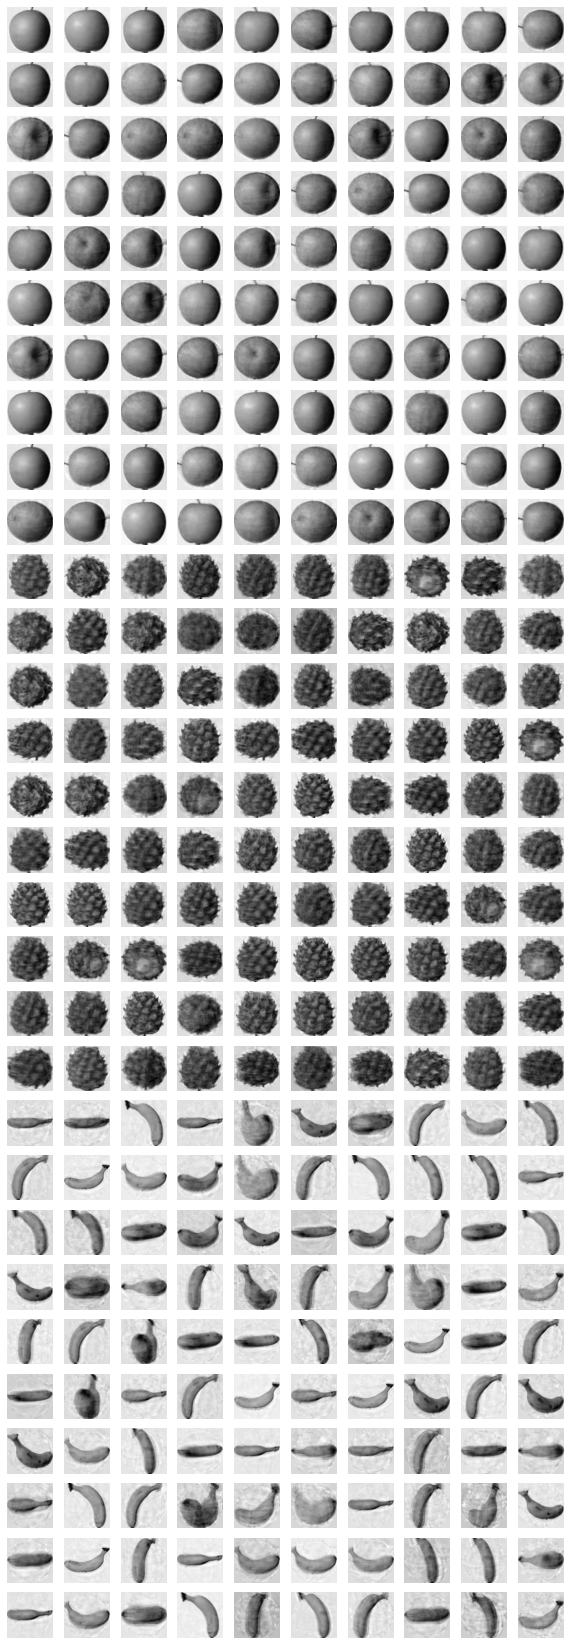

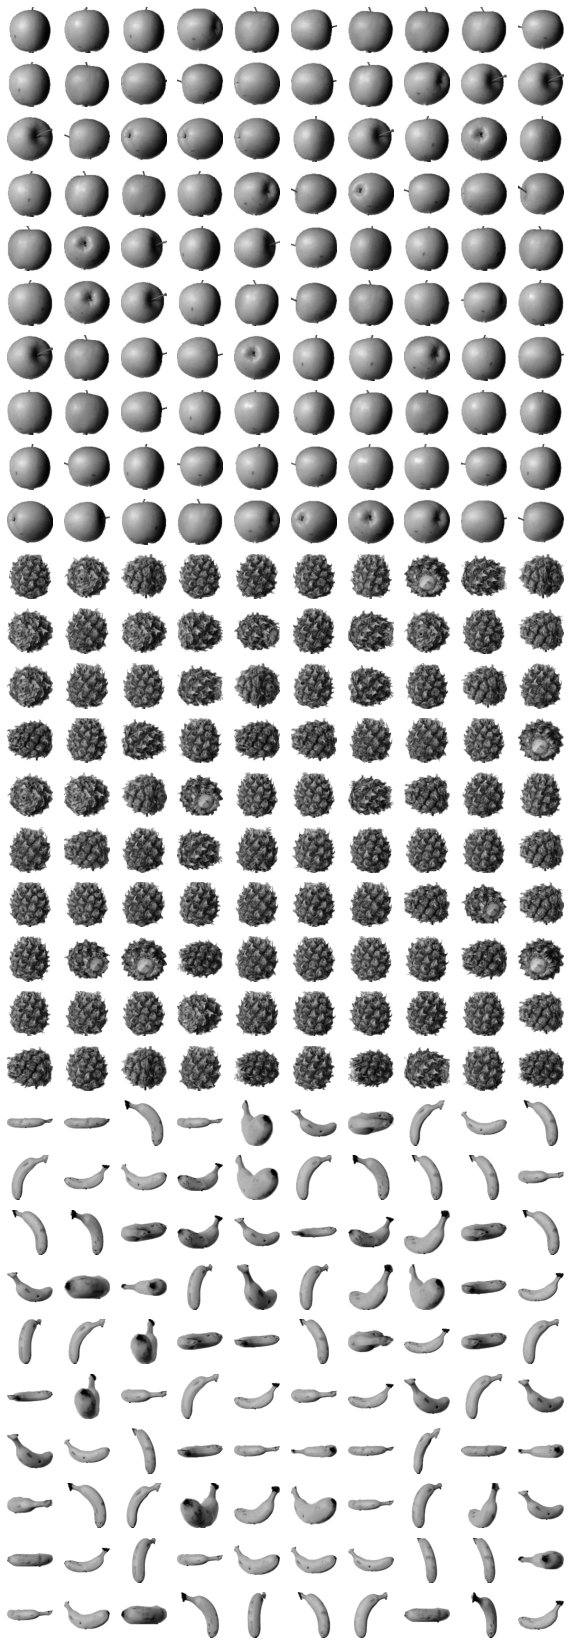

In [39]:
'''원본 데이터 재구성'''
fruits_inverse = pca.inverse_transform(fruits_pca) # PCA를 통해 압축된 데이터를 재구성
print(fruits_inverse)
draw_fruits(fruits_inverse.reshape(-1, 100, 100)) # PCA로 압축후 재구성된 데이터 시각화
draw_fruits(fruits_2d.reshape(-1, 100, 100)) # 원본 데이터 시각화

0.9215803034686176


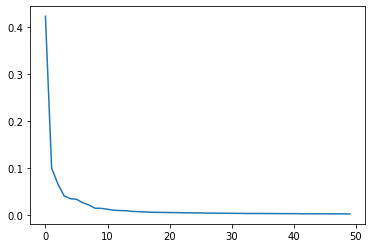

In [40]:
'''설명된 분산'''
print(np.sum(pca.explained_variance_ratio_)) # 총 분산 비율(각 주성분의 설명된 분산 비율) 출력

# 설명된 분산 시각화
plt.plot(pca.explained_variance_ratio_) # 처음 10개의 주성분이 대부분의 분산을 표현하고 있음
plt.show()

In [44]:
'''다른 알고리즘과 함께 사용하기'''
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100) # 사과(0), 파인애플(1), 바나나(2)에 대한 임의의 타깃 데이터 생성

'''Cross_Validate'''
from sklearn.model_selection import cross_validate
# 원본 데이터에 교차 검증
scores = cross_validate(LR, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 차원축소된 데이터에 교차 검증
scores = cross_validate(LR, fruits_pca, target)
print(np.mean(scores['test_score'])) # 정확도가 높아짐
print(np.mean(scores['fit_time'])) # 학습속도 또한 빨라짐

# 분산의 50%에 해당하는 주성분을 찾음
pca = PCA(n_components=0.5) # n_components에 주성분의 갯수 대신, 설명된 분산의 비율(0~1사이 값)을 대입해도 됨.
pca.fit(fruits_2d)
print(pca.n_components_) # 2개의 주성분으로 분산의 50%를 표현할 수 있음
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape) # 압축된 데이터의 크기 출력

scores = cross_validate(LR, fruits_pca, target)
print(np.mean(scores['test_score'])) # 99%의 정확도를 보임
print(np.mean(scores['fit_time']))

0.9966666666666667
0.29677519798278806
0.9933333333333334
0.020198965072631837


/Users/gimdong-yeong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gimdong-yeong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

2
(300, 2)
0.9933333333333334
0.02088479995727539
(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/Users/gimdong-yeong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gimdong-yeong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


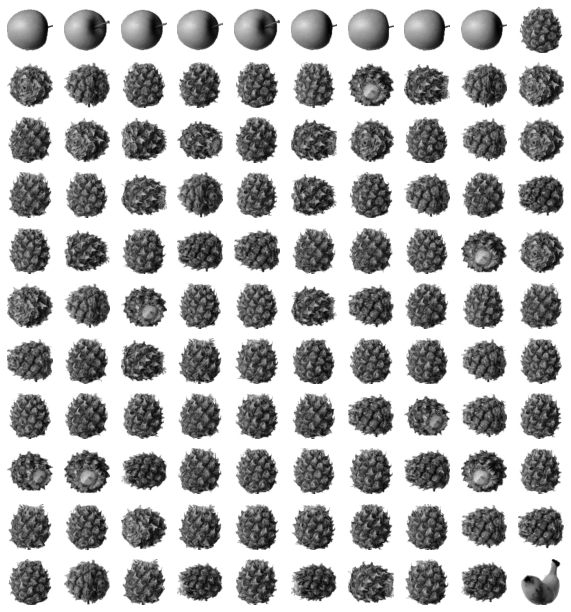

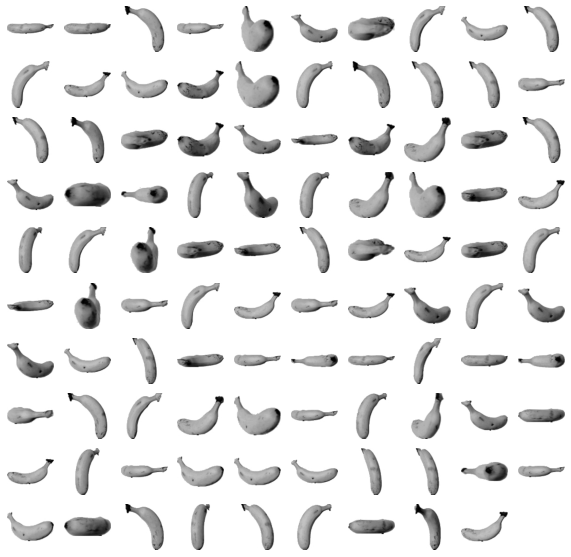

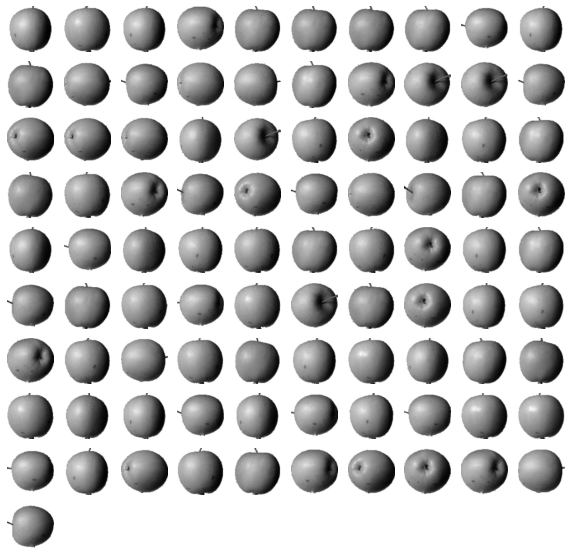

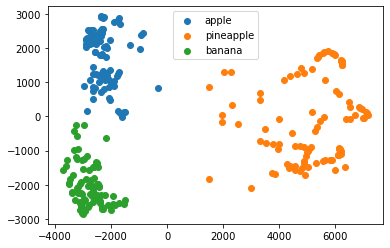

In [46]:
'''K-Means'''
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=42)
KM.fit(fruits_pca)
print(np.unique(KM.labels_, return_counts=True))

# K-Means에서 찾은 레이블을 이용해 원본 과일 데이터를 출력
for label in range(0,3):
    draw_fruits(fruits[KM.labels_ == label])
    print("\n")

# K-Means에서 찾은 레이블을 이용해 PCA 압축 과일 데이터를 출력
for label in range(0,3):
    data = fruits_pca[KM.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','pineapple','banana'])
plt.show()